In [1]:
import os, sys
import numpy as np, pandas as pd
import scipy.io
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = os.path.join(os.path.dirname(""), "..", "data")
data_path = os.path.join(DATA_PATH, "TrainingData_vol2")

In [3]:
data_len = 42

In [4]:
mat_contents = {}
for idx in range(data_len):
    # load .mat file
    file_idx = f"0{idx+1}" if idx < 9 else idx+1
    filename = os.path.join(data_path, f"case0{file_idx}_result.mat")
    mat_contents[idx] = scipy.io.loadmat(filename)

In [5]:
len(mat_contents[0]['mixed'][0])

100

In [6]:
# shape of echo_shape
mat_contents[0]['mixed'][0][0][1].shape

(54, 12)

Visualize CPMG

In [7]:
all_cpmg = []

len_mixed = 100

for idx in range(data_len):
    for idx_mixed in range(len_mixed):
        all_cpmg.append(mat_contents[idx]['mixed'][0][idx_mixed][0])

In [8]:
cpmg_data = np.array(all_cpmg)

In [9]:
cpmg_data.shape

(4200, 2048, 1)

Get all MQIs

In [10]:
mqi_basis = []
mqi_mixed = []

len_basis = 24
len_mixed = 100

for idx in range(data_len):
    for idx_mixed in range(len_mixed):
        mqi_mixed.append(mat_contents[idx]['mixed'][0][idx_mixed][2][0])

In [11]:
#mqi_basis = np.concatenate(mqi_basis).tolist()
mqi_mixed = np.concatenate(mqi_mixed).tolist()

In [12]:
np.mean(mqi_mixed), np.max(mqi_mixed), np.min(mqi_mixed), np.median(mqi_mixed)

(np.float64(0.5175007178208985),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.6535098825325306))

In [13]:
len(mqi_mixed)

4200

Get all Speeds

In [14]:
speed = []

for idx in range(data_len):
    speed.append(mat_contents[idx]['v'][0][0])

In [15]:
mat_contents[idx]['v'][0][0]

np.float64(3216.990877275948)

In [16]:
np.mean(speed), np.max(speed), np.min(speed), np.median(speed)

(np.float64(299.2367002544278),
 np.float64(3216.990877275948),
 np.float64(1.5707963267948966),
 np.float64(75.39822368615503))

Get all Amplitudes

In [17]:
amp = []

for idx in range(data_len):
    amp.append(mat_contents[idx]['d'][0][0])

In [18]:
np.mean(amp), np.max(amp), np.min(amp), np.median(amp)

(np.float64(10.5), np.uint8(32), np.uint8(1), np.float64(6.0))

In [19]:
len(speed)

42

In [20]:
len(amp)

42

Plot data

Text(0.5, 0.95, 'MQI = 0.9906')

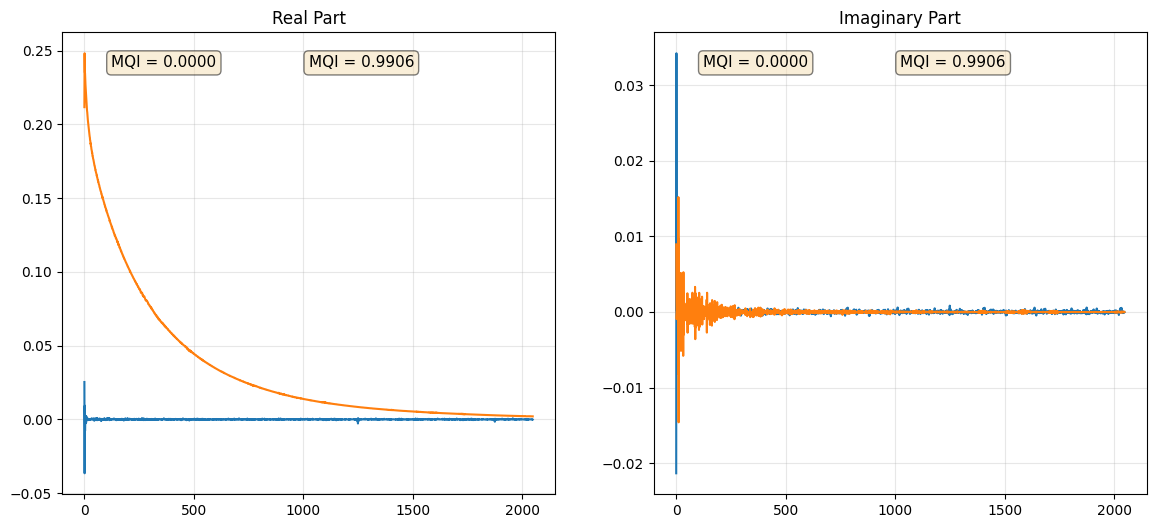

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

data_idx = 4199

axes[0].plot(cpmg_data.real[data_idx])
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.1, 0.95, f'MQI = {mqi_mixed[data_idx]:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].plot(cpmg_data.imag[data_idx])
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.1, 0.95, f'MQI = {mqi_mixed[data_idx]:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

data_idx = 1

axes[0].plot(cpmg_data.real[data_idx])
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.5, 0.95, f'MQI = {mqi_mixed[data_idx]:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].plot(cpmg_data.imag[data_idx])
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.5, 0.95, f'MQI = {mqi_mixed[data_idx]:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [39]:
np.percentile(np.array(mqi_mixed), 31.36)

np.float64(0.0)

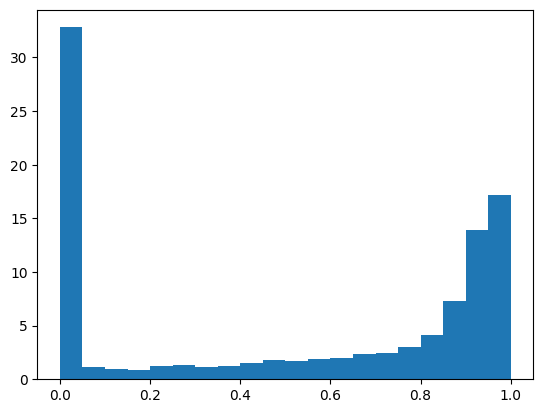

In [57]:
plt.hist(mqi_mixed, weights=100*np.ones(len(mqi_mixed)) / len(mqi_mixed), bins=20);

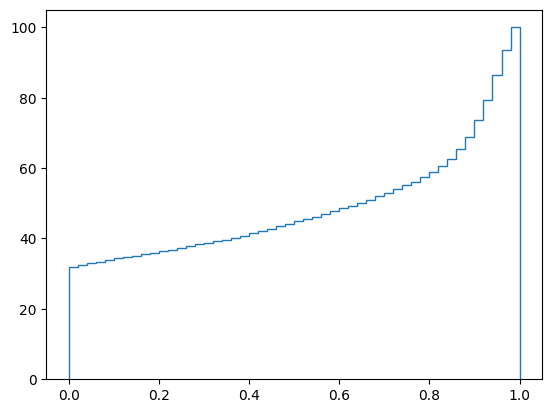

In [55]:
plt.hist(mqi_mixed, weights=100*np.ones(len(mqi_mixed)) / len(mqi_mixed), bins=50,
         cumulative=True, histtype='step');

Do feature eng with FFT

In [23]:
all_cpmg_mqi = []
mqi_mixed_mqi = []

len_mixed = 100
condition = False
sample = None
for idx in range(data_len):
    v = mat_contents[idx]['v'][0][0]
    d = mat_contents[idx]['d'][0][0]
    
    # Pre-select speed or displacement

    #if d != 32: continue # 1, 2, 4, 8, 16, 32
    # 1.57, 3.14, 6.28, 12.6, 25.1, 50.3, 100.5, 201.1, 400.2, 804.24, 1608.5, 3216.99
    #if v < 50 or v > 51:
    #    continue
    #print(v)

    for idx_mixed in range(len_mixed):

        mqi = mat_contents[idx]['mixed'][0][idx_mixed][2][0][0]
        mqi_mixed_mqi.append(mqi)
        condition = mqi > 0#(mqi > 0.7) and (mqi < 0.75)
        if condition:
            sample = mat_contents[idx]['mixed'][0][idx_mixed][0]
            break
    
        #condition = mat_contents[idx]['mixed'][0][idx_mixed][0][-1] > 3. and mat_contents[idx]['mixed'][0][idx_mixed][0][-1] < 15.
        
        #if condition:
        #    sample = mat_contents[idx]['mixed'][0][idx_mixed][0]
        #    break
    
    if condition:
        break

        #if mqi > 1e-3:
        #    all_cpmg_mqi.append(mat_contents[idx]['mixed'][0][idx_mixed][0])
        #    mqi_mixed_mqi.append(mqi)

mqi_mixed_mqi = np.array(mqi_mixed_mqi)
#cpmg_data_mqi = np.array(all_cpmg_mqi)
#len(mqi_mixed_mqi)

print(mqi_mixed_mqi.min(), mqi_mixed_mqi.max())
print(sample.shape)

0.9929668494876982 0.9929668494876982
(2048, 1)


In [24]:
mqi, v, d

(np.float64(0.9929668494876982), np.float64(1.5707963267948966), np.uint8(1))

Feature Engineering with FFT

Text(0.1, 0.95, 'MQI = 0.9930')

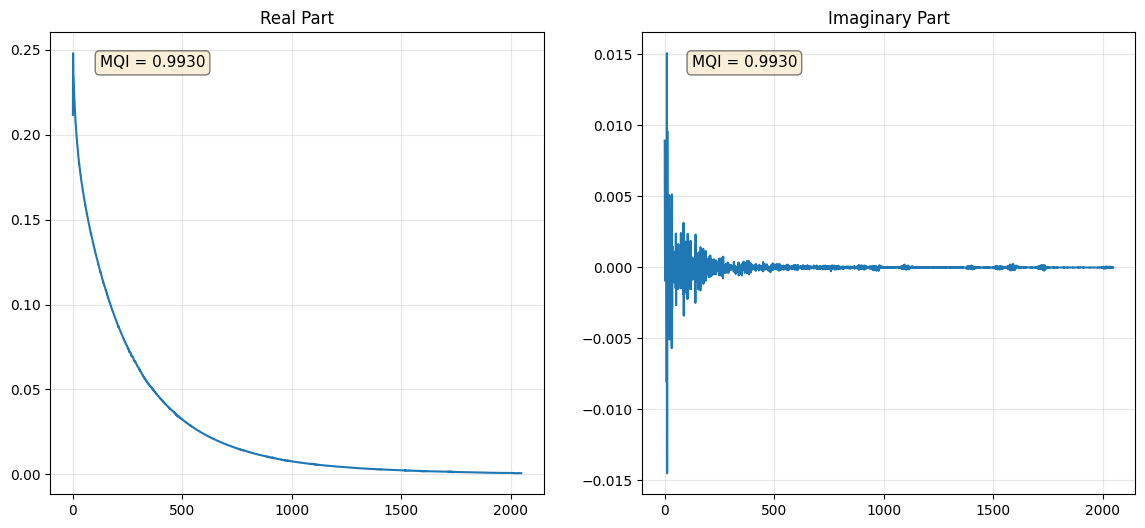

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(sample.real)
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].plot(sample.imag)
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Text(0.1, 0.95, 'MQI = 0.9930')

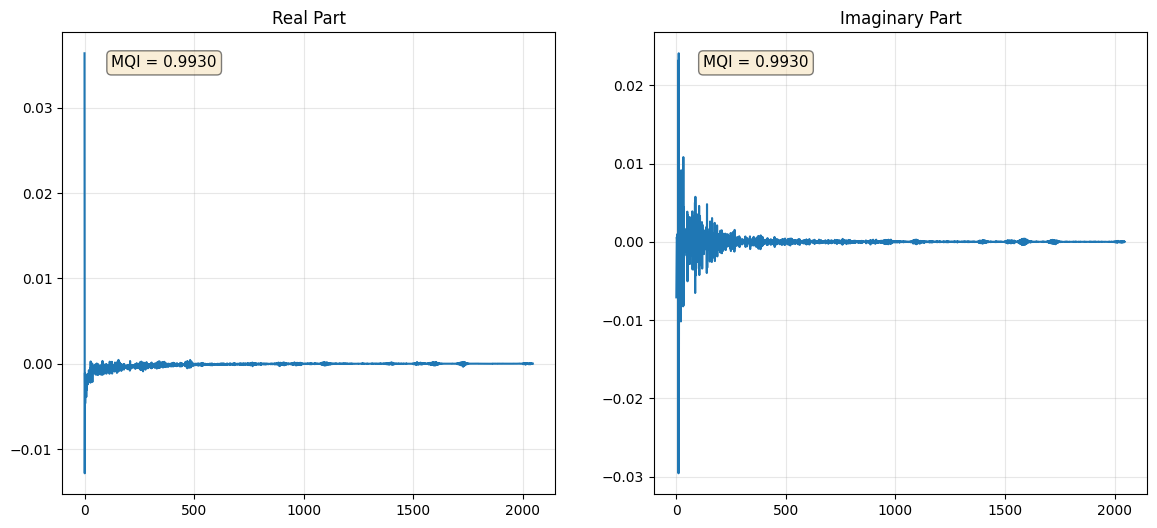

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

real_part = np.diff(sample.real.flatten())

axes[0].plot(real_part)
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

imag_part = np.diff(sample.imag.flatten())
    
axes[1].plot(imag_part)
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [616]:
new_data = np.empty(real_part.shape, dtype=np.complex64)
new_data.real = real_part
new_data.imag = imag_part

abc = fft(new_data)

Text(0.1, 0.95, 'MQI = 0.0000')

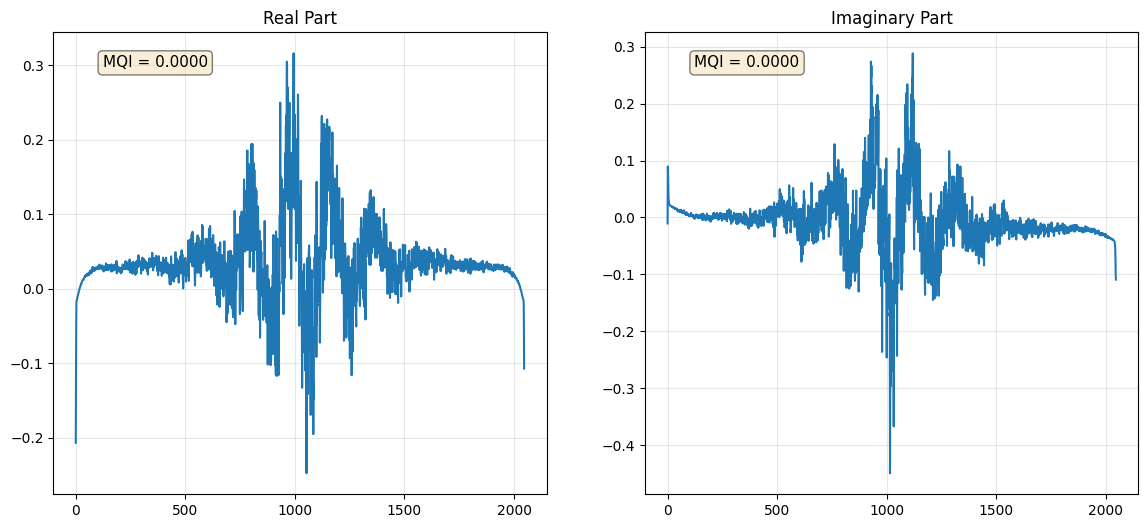

In [617]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(abc.real)
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].plot(abc.imag)
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


In [606]:
duration = 2047
sample_rate = 1
n = int(sample_rate * duration)

In [607]:
xf = fftfreq(n, 1/sample_rate)
yf = abc

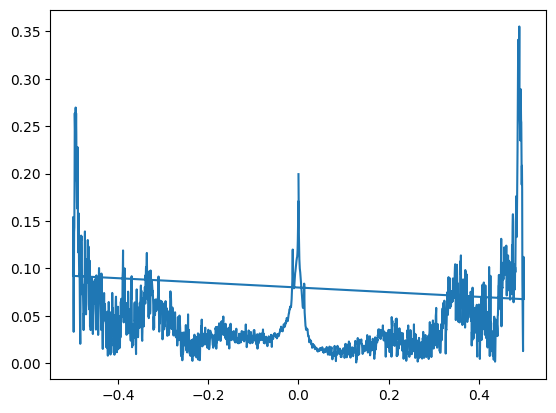

In [608]:
plt.plot(xf, np.abs(yf))

In [84]:
all_cpmg_mqi = []
mqi_mixed_mqi = []

len_mixed = 100
condition = False
sample = None
for idx in range(data_len):
    v = mat_contents[idx]['v'][0][0]
    d = mat_contents[idx]['d'][0][0]
    
    # Pre-select speed or displacement

    if d != 4: continue # 1, 2, 4, 8, 16, 32
    # 1.57, 3.14, 6.28, 12.6, 25.1, 50.3, 100.5, 201.1, 400.2, 804.24, 1608.5, 3216.99
    #if v < 50 or v > 51:
    #    continue
    #print(v)

    for idx_mixed in range(len_mixed):

        mqi = mat_contents[idx]['mixed'][0][idx_mixed][2][0][0]
        mqi_mixed_mqi.append(mqi)
        condition = (mqi > 0.5)# and (v > 405) #(mqi > 0.7) and (mqi < 0.75)
        if condition:
            sample = mat_contents[idx]['mixed'][0][idx_mixed][0]
            print(v, mqi)
            #break
    
        #condition = mat_contents[idx]['mixed'][0][idx_mixed][0][-1] > 3. and mat_contents[idx]['mixed'][0][idx_mixed][0][-1] < 15.
        
        #if condition:
        #    sample = mat_contents[idx]['mixed'][0][idx_mixed][0]
        #    break
    
    #if condition:
    #    print(v)
        #break

        #if mqi > 1e-3:
        #    all_cpmg_mqi.append(mat_contents[idx]['mixed'][0][idx_mixed][0])
        #    mqi_mixed_mqi.append(mqi)

mqi_mixed_mqi = np.array(mqi_mixed_mqi)
#cpmg_data_mqi = np.array(all_cpmg_mqi)
#len(mqi_mixed_mqi)

#print(mqi_mixed_mqi.min(), mqi_mixed_mqi.max())
#print(sample.shape)

6.283185307179586 0.9754050727831034
6.283185307179586 0.9695853858528021
6.283185307179586 0.9640100769462729
6.283185307179586 0.9610609570962727
6.283185307179586 0.9666208423934413
6.283185307179586 0.9667807252105038
6.283185307179586 0.9602047832845546
6.283185307179586 0.9563135585712745
6.283185307179586 0.9559582562407849
6.283185307179586 0.9310606260547545
6.283185307179586 0.9071630744426582
6.283185307179586 0.9093807063445434
6.283185307179586 0.9630824019114059
6.283185307179586 0.9381520223531365
6.283185307179586 0.9640141902591648
6.283185307179586 0.9927605860642765
6.283185307179586 0.9711057683197415
6.283185307179586 0.9802618838772716
6.283185307179586 0.9864930316196225
6.283185307179586 0.972285629504458
6.283185307179586 0.9458321837193076
6.283185307179586 0.9093996595519536
6.283185307179586 0.991148413960927
6.283185307179586 0.917324223026103
6.283185307179586 0.9872812653961398
6.283185307179586 0.9698515822473064
6.283185307179586 0.9223870831948677
6.28

In [73]:
mqi

np.float64(0.8989879599385842)

Text(0.1, 0.95, 'MQI = 0.0000')

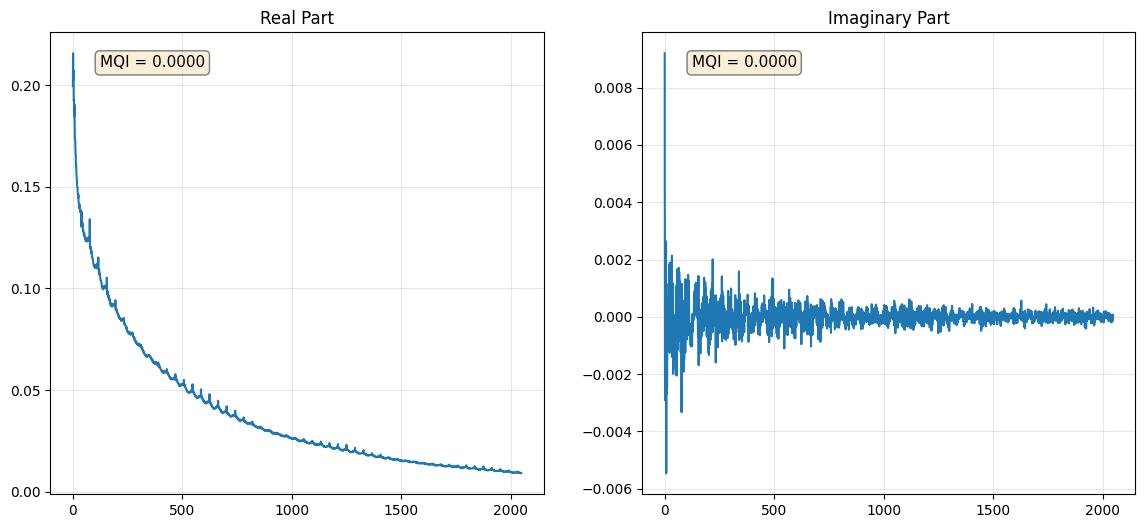

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(sample.real)
axes[0].set_title("Real Part")
axes[0].grid(True, alpha=0.3)
axes[0].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[0].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1].plot(sample.imag)
axes[1].set_title("Imaginary Part")
axes[1].grid(True, alpha=0.3)
axes[1].text(0.1, 0.95, f'MQI = {mqi:.4f}',
    transform=axes[1].transAxes,
    fontsize=11, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

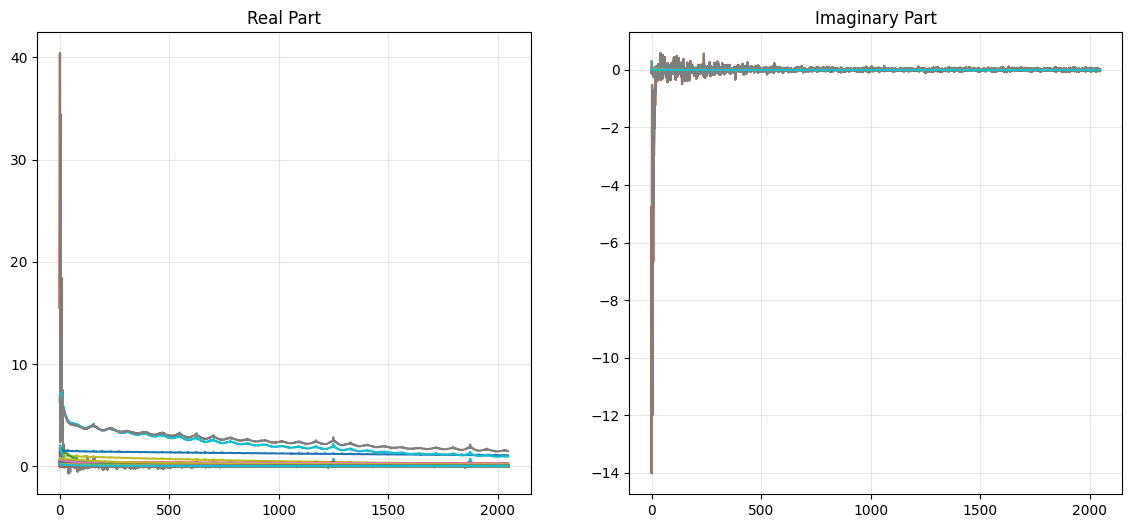

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

total_data = 300
#data_idx = len(mqi_mixed_mqi)-1
for idx in range(total_data):

    data_idx = len(mqi_mixed_mqi)-total_data - idx

    axes[0].plot(cpmg_data.real[data_idx])
    axes[0].set_title("Real Part")
    axes[0].grid(True, alpha=0.3)
    #axes[0].text(0.1, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[0].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axes[1].plot(cpmg_data.imag[data_idx])
    axes[1].set_title("Imaginary Part")
    axes[1].grid(True, alpha=0.3)
    #axes[1].text(0.1, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[1].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    data_idx = len(mqi_mixed_mqi)- total_data - total_data - idx

    axes[0].plot(cpmg_data.real[data_idx])
    axes[0].set_title("Real Part")
    axes[0].grid(True, alpha=0.3)
    #axes[0].text(0.5, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[0].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axes[1].plot(cpmg_data.imag[data_idx])
    axes[1].set_title("Imaginary Part")
    axes[1].grid(True, alpha=0.3)
    #axes[1].text(0.5, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[1].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Get MQI zero samples

In [473]:
all_cpmg_mqi = []
mqi_mixed_mqi = []

len_mixed = 100

for idx in range(data_len):
    for idx_mixed in range(len_mixed):
        mqi = mat_contents[idx]['mixed'][0][idx_mixed][2][0][0]
        if mqi < 1e-3:
            all_cpmg_mqi.append(mat_contents[idx]['mixed'][0][idx_mixed][0])
            mqi_mixed_mqi.append(mqi)

mqi_mixed_mqi = np.array(mqi_mixed_mqi)
cpmg_data_mqi = np.array(all_cpmg_mqi)
len(mqi_mixed_mqi)

1320

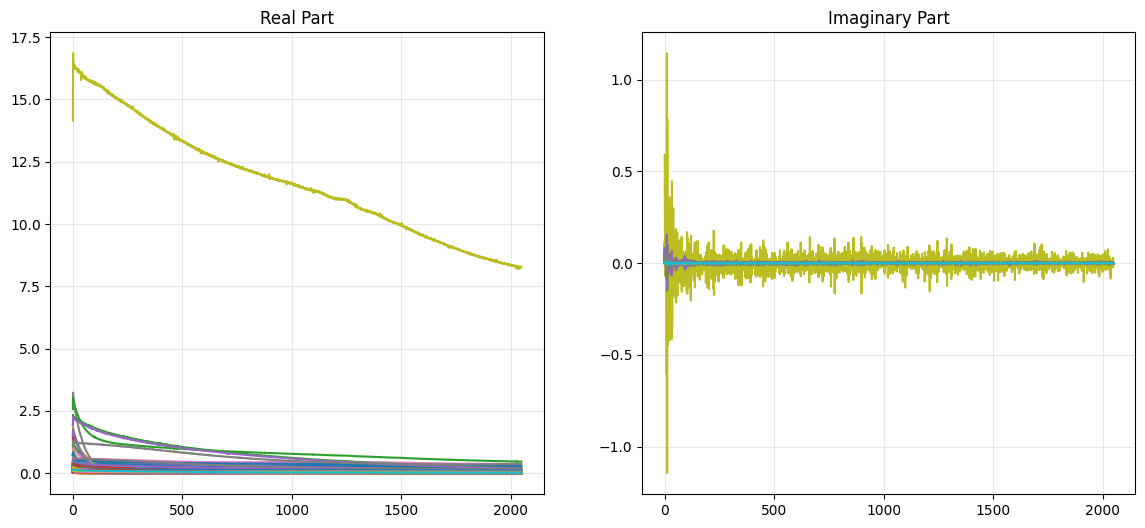

In [474]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

total_data = 300
#data_idx = len(mqi_mixed_mqi)-1
for idx in range(total_data):

    data_idx = len(mqi_mixed_mqi)- total_data - idx

    axes[0].plot(cpmg_data.real[data_idx])
    axes[0].set_title("Real Part")
    axes[0].grid(True, alpha=0.3)
    #axes[0].text(0.1, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[0].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axes[1].plot(cpmg_data.imag[data_idx])
    axes[1].set_title("Imaginary Part")
    axes[1].grid(True, alpha=0.3)
    #axes[1].text(0.1, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[1].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    data_idx = len(mqi_mixed_mqi)- total_data - total_data - idx

    axes[0].plot(cpmg_data.real[data_idx])
    axes[0].set_title("Real Part")
    axes[0].grid(True, alpha=0.3)
    #axes[0].text(0.5, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[0].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    axes[1].plot(cpmg_data.imag[data_idx])
    axes[1].set_title("Imaginary Part")
    axes[1].grid(True, alpha=0.3)
    #axes[1].text(0.5, 0.95, f'MQI = {mqi_mixed_mqi[data_idx]:.4f}',
    #    transform=axes[1].transAxes,
    #    fontsize=11, verticalalignment='top',
    #    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Criteria for outlier detection:

- Check the std-dev of the last 1000 channels of the imaginary part
- Check the magnitude of the first 5-10 channels of the real part
- Check the magnitude of the last 5-10 channels of the real part
- Eliminate the trend of the real part
- Eliminate some outliers by applying percentiles (np.percentile(array, 10))